In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifelines
import torch
import pyro

In [2]:
from propensity_prediction.tasks.churn_prediction.main import churn_prediction

# Debug

In [3]:
# import pandas as pd
# df = pd.read_csv('../data/NKI_cleaned/NKI_cleaned.csv')
# df.head()

In [4]:
def parse_evaluation(eva_res): #only for binary classification tasks 
    print ('AUC: ', eva_res['auc'])
    print (eva_res.keys())
    print (eva_res['binarize_methods'][0].keys())
    print ('------------------------------------------Sample------------------------------------------')
    print ('Binarize method: ', eva_res['binarize_methods'][0]['method'])
    return eva_res['binarize_methods'][0]['list_results']

In [5]:
JSON_CONFIG_PATH = '../data/NKI_cleaned/config.json'
import json
f = open(JSON_CONFIG_PATH, 'r')
global_config = json.load(f)
global_config

{'task_name': 'churn_prediction',
 'pipeline_config_path': '../data/NKI_cleaned/pipeline_bestconfig.json',
 'data_config': {'path': '../data/NKI_cleaned/NKI_cleaned.csv',
  'History': {'user_id': 'ID',
   'user_seniority': 'timerecurrence',
   'event': 'eventdeath',
   'metadata': {'Patient': 'id',
    'age': 'numeric',
    'survival': 'numeric',
    'chemo': 'numeric',
    'hormonal': 'numeric',
    'amputation': 'numeric',
    'histtype': 'numeric',
    'diam': 'numeric',
    'posnodes': 'numeric',
    'grade': 'numeric',
    'angioinv': 'numeric',
    'lymphinfil': 'numeric',
    'barcode': 'numeric',
    'esr1': 'numeric',
    'G3PDH_570': 'numeric',
    'Contig45645_RC': 'numeric',
    'Contig44916_RC': 'numeric',
    'D25272': 'numeric',
    'J00129': 'numeric',
    'Contig29982_RC': 'numeric',
    'Contig56678_RC': 'numeric',
    'Contig53047_RC': 'numeric',
    'Contig19551': 'numeric',
    'Contig47230_RC': 'numeric',
    'Contig46501_RC': 'numeric',
    'Contig20749_RC': 'num

In [6]:
global_config['pipeline_config_path'] = '' #Run with default config

# Run all

In [7]:
predict, eva, ens_model = churn_prediction(global_config) #predict on full dataset, evaluate on validating dataset

Prepare contextual data
Prepare data for models
Train ensemble Ensemble
+ Prepare model LogisticRegression with label eventdeath


/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a co

    Training with minibacth  0
	+ [iteration 0001] Loss: 0.0030, Best loss: 0.0030
	+ [iteration 0102] Loss: 0.0021, Best loss: 0.0021
    -> Early stop at epoch 102
----Running time:  0.561591625213623
+ Prepare model Bayesian_LogisticRegression with label eventdeath
    Training with minibacth  0
	+ [iteration 0001] Loss: 0.0011, Best loss: 0.0011


/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


	+ [iteration 0103] Loss: 0.0007, Best loss: 0.0007
    -> Early stop at epoch 103
----Running time:  0.1384296417236328


/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a co

In [8]:
# import pandas as pd
# df = pd.read_csv('../data/NKI_cleaned/NKI_cleaned.csv')
# y = ens_model._get_labels(df)
# y

In [9]:
print (predict['model_name'])
predict['predict']

Ensemble


,ID,probabilities,predict
0,18,0.066269,0
1,19,0.146898,0
2,20,0.104784,0
3,21,0.023493,0
4,22,0.204358,0
...,...,...,...
267,308,0.890880,1
268,309,0.434717,0
269,310,0.524839,1
270,311,0.833939,1


In [10]:
print (eva['model_name'])
eva['results']

Ensemble


{'auc': 0.6575091575091575,
 'binarize_methods': [{'method': 'threshold',
   'list_results': [{'threshold_method': 'constant',
     'results': {'accuracy': 0.7090909090909091,
      'precision': 0.3076923076923077,
      'recall': 0.36363636363636365,
      'trueneg_rate': 0.8333333333333334,
      'f1_score': 0.33333333333333337}},
    {'threshold_method': 'baseline',
     'results': {'accuracy': 0.7272727272727273,
      'precision': 0.07692307692307693,
      'recall': 0.25,
      'trueneg_rate': 0.9285714285714286,
      'f1_score': 0.11764705882352941}},
    {'threshold_method': 'kmeans',
     'results': {'accuracy': 0.7090909090909091,
      'precision': 0.3076923076923077,
      'recall': 0.36363636363636365,
      'trueneg_rate': 0.8333333333333334,
      'f1_score': 0.33333333333333337}},
    {'threshold_method': 'otsu',
     'results': {'accuracy': 0.7272727272727273,
      'precision': 0.38461538461538464,
      'recall': 0.4166666666666667,
      'trueneg_rate': 0.833333333

In [11]:
print (eva['model_name'])
parse_evaluation(eva['results'])

Ensemble
AUC:  0.6575091575091575
dict_keys(['auc', 'binarize_methods'])
dict_keys(['method', 'list_results'])
------------------------------------------Sample------------------------------------------
Binarize method:  threshold


[{'threshold_method': 'constant',
  'results': {'accuracy': 0.7090909090909091,
   'precision': 0.3076923076923077,
   'recall': 0.36363636363636365,
   'trueneg_rate': 0.8333333333333334,
   'f1_score': 0.33333333333333337}},
 {'threshold_method': 'baseline',
  'results': {'accuracy': 0.7272727272727273,
   'precision': 0.07692307692307693,
   'recall': 0.25,
   'trueneg_rate': 0.9285714285714286,
   'f1_score': 0.11764705882352941}},
 {'threshold_method': 'kmeans',
  'results': {'accuracy': 0.7090909090909091,
   'precision': 0.3076923076923077,
   'recall': 0.36363636363636365,
   'trueneg_rate': 0.8333333333333334,
   'f1_score': 0.33333333333333337}},
 {'threshold_method': 'otsu',
  'results': {'accuracy': 0.7272727272727273,
   'precision': 0.38461538461538464,
   'recall': 0.4166666666666667,
   'trueneg_rate': 0.8333333333333334,
   'f1_score': 0.4}},
 {'threshold_method': 'yen',
  'results': {'accuracy': 0.5636363636363636,
   'precision': 0.6923076923076923,
   'recall': 0.31

In [12]:
sub_0 = eva['evaluate_sub_models'][0]
print (sub_0['model_name'])
parse_evaluation(sub_0['results'])

LogisticRegression
AUC:  0.6593406593406593
dict_keys(['auc', 'binarize_methods'])
dict_keys(['method', 'list_results'])
------------------------------------------Sample------------------------------------------
Binarize method:  threshold


[{'threshold_method': 'constant',
  'results': {'accuracy': 0.7090909090909091,
   'precision': 0.3076923076923077,
   'recall': 0.36363636363636365,
   'trueneg_rate': 0.8333333333333334,
   'f1_score': 0.33333333333333337}},
 {'threshold_method': 'baseline',
  'results': {'accuracy': 0.7454545454545455,
   'precision': 0.07692307692307693,
   'recall': 0.3333333333333333,
   'trueneg_rate': 0.9523809523809523,
   'f1_score': 0.125}},
 {'threshold_method': 'kmeans',
  'results': {'accuracy': 0.7090909090909091,
   'precision': 0.3076923076923077,
   'recall': 0.36363636363636365,
   'trueneg_rate': 0.8333333333333334,
   'f1_score': 0.33333333333333337}},
 {'threshold_method': 'otsu',
  'results': {'accuracy': 0.7272727272727273,
   'precision': 0.38461538461538464,
   'recall': 0.4166666666666667,
   'trueneg_rate': 0.8333333333333334,
   'f1_score': 0.4}},
 {'threshold_method': 'yen',
  'results': {'accuracy': 0.6363636363636364,
   'precision': 0.5384615384615384,
   'recall': 0.33

## Test functions

In [13]:
from propensity_prediction.auto_preprocess.base import Base_Preprocess

from propensity_prediction.config.model_config import ChurnPrediction_ModelConfig
from propensity_prediction.config.data_config import ChurnPrediction_DataConfig
from propensity_prediction.config.base import Base_TaskConfig
from propensity_prediction.tasks.churn_prediction.churn_prediction import ChurnPrediction_Task


class ChurnPrediction_Config(Base_TaskConfig):
	def __init__(self, global_config):
		data_config = ChurnPrediction_DataConfig(global_config['data_config'])
		model_config = ChurnPrediction_ModelConfig(global_config['pipeline_config_path'])
		super().__init__(data_config, model_config)

def prepare_task(global_config):
	task_config = ChurnPrediction_Config(global_config)

	data_path = task_config.get_datapath()
	key_types, feature_types = task_config.parse_data_config()
	df = pd.read_csv(data_path, dtype=str)
	auto_preprocess_obj = Base_Preprocess(key_types, feature_types)
	training_data, preprocessed_feature_types = auto_preprocess_obj.auto_preprocess(df)
	task_config.update_metadata(preprocessed_feature_types)
	task_config.update_metadata(preprocessed_feature_types)

	return training_data, task_config

In [14]:
training_data, task_config = prepare_task(global_config)
training_data.head()

,age,survival,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,...,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420,ID,timerecurrence,eventdeath
0,0.629630,0.800124,0.0,0.0,1.0,0.0,0.479167,0.000000,0.5,1.0,...,0.190780,0.336198,0.490318,0.758116,0.318564,0.439992,0.720696,18,14.817248,0
1,0.814815,0.768598,0.0,0.0,0.0,0.0,0.375000,0.000000,1.0,1.0,...,0.221238,0.307950,0.474978,0.276844,0.227892,0.348031,0.664516,19,14.261465,0
2,0.444444,0.336543,0.0,0.0,0.0,0.0,0.270833,0.000000,0.5,0.0,...,0.215903,0.217656,0.475009,0.670865,0.301763,0.650751,0.602675,20,6.644764,0
3,0.888889,0.399130,0.0,1.0,0.0,0.0,0.270833,0.076923,0.5,1.0,...,0.282384,0.436140,0.458078,0.584130,0.193999,0.479604,0.957911,21,7.748118,0
4,0.444444,0.324740,0.0,0.0,1.0,0.0,0.270833,0.000000,0.5,0.5,...,0.266713,0.365183,0.472963,0.318306,0.340004,0.336596,0.714126,22,6.31896,0


In [15]:
pred = ens_model.predict(training_data)
print (pred['model_name'])
pred['predict']

Ensemble


/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ID,probabilities,predict
0,18,0.179125,0
1,19,0.250203,0
2,20,0.212847,0
3,21,0.141463,0
4,22,0.300572,0
...,...,...,...
267,308,0.903907,1
268,309,0.503731,0
269,310,0.581872,1
270,311,0.855098,1


In [16]:
prob = ens_model.get_probabilities(training_data)
print (prob['model_name'])
prob['probabilities']

Ensemble


/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ID,LogisticRegression,Bayesian_LogisticRegression,results
0,18,0.154080,0.204171,0.179125
1,19,0.235195,0.265211,0.250203
2,20,0.183211,0.242483,0.212847
3,21,0.112946,0.169979,0.141463
4,22,0.281165,0.319979,0.300572
...,...,...,...,...
267,308,0.894407,0.913406,0.903907
268,309,0.516507,0.490955,0.503731
269,310,0.553024,0.610720,0.581872
270,311,0.894696,0.815500,0.855098


In [17]:
eva = ens_model.evaluate(training_data)
print (eva['model_name'])
eva['results']

Ensemble


{'auc': 0.8215451215451215,
 'binarize_methods': [{'method': 'threshold',
   'list_results': [{'threshold_method': 'constant',
     'results': {'accuracy': 0.7794117647058824,
      'precision': 0.6103896103896104,
      'recall': 0.6103896103896104,
      'trueneg_rate': 0.8461538461538461,
      'f1_score': 0.6103896103896104}},
    {'threshold_method': 'baseline',
     'results': {'accuracy': 0.7647058823529411,
      'precision': 0.4675324675324675,
      'recall': 0.6101694915254238,
      'trueneg_rate': 0.882051282051282,
      'f1_score': 0.5294117647058822}},
    {'threshold_method': 'kmeans',
     'results': {'accuracy': 0.7720588235294118,
      'precision': 0.5844155844155844,
      'recall': 0.6,
      'trueneg_rate': 0.8461538461538461,
      'f1_score': 0.5921052631578947}},
    {'threshold_method': 'otsu',
     'results': {'accuracy': 0.7794117647058824,
      'precision': 0.6103896103896104,
      'recall': 0.6103896103896104,
      'trueneg_rate': 0.8461538461538461,


## Test saving/loading

In [18]:
package = ens_model.package_for_save()
package

{'model_name': 'Ensemble',
 'model_package': [{'model_name': 'LogisticRegression',
   'model_package': OrderedDict([('linear.weight',
                 tensor([[ 0.0401,  0.0495,  0.0434,  ..., -0.0153,  0.0129,  0.0128]])),
                ('linear.bias', tensor([-0.0230]))]),
   'training_constant': {'churn_rate': 0.29493087557603687,
    'feature_engineering': {'pca': None,
     'scoring': {0: {'impact': -1},
      1: {'impact': -1},
      2: {'impact': -1},
      3: {'impact': -1},
      4: {'impact': 1},
      5: {'impact': -1},
      6: {'impact': 1},
      7: {'impact': 1},
      8: {'impact': 1},
      9: {'impact': 1},
      10: {'impact': 1},
      11: {'impact': -1},
      12: {'impact': -1},
      13: {'impact': 1},
      14: {'impact': -1},
      15: {'impact': -1},
      16: {'impact': -1},
      17: {'impact': -1},
      18: {'impact': -1},
      19: {'impact': -1},
      20: {'impact': 1},
      21: {'impact': -1},
      22: {'impact': -1},
      23: {'impact': -1},
    

In [19]:
training_data, task_config = prepare_task(global_config)

In [20]:
load_model = ChurnPrediction_Task(task_config)
load_model = load_model.load_from_savepackage(package)

In [21]:
eva = load_model.evaluate(training_data)
print (eva['model_name'])
eva['results']

Ensemble


{'auc': 0.820945720945721,
 'binarize_methods': [{'method': 'threshold',
   'list_results': [{'threshold_method': 'constant',
     'results': {'accuracy': 0.7794117647058824,
      'precision': 0.6103896103896104,
      'recall': 0.6103896103896104,
      'trueneg_rate': 0.8461538461538461,
      'f1_score': 0.6103896103896104}},
    {'threshold_method': 'baseline',
     'results': {'accuracy': 0.7647058823529411,
      'precision': 0.4675324675324675,
      'recall': 0.6101694915254238,
      'trueneg_rate': 0.882051282051282,
      'f1_score': 0.5294117647058822}},
    {'threshold_method': 'kmeans',
     'results': {'accuracy': 0.7757352941176471,
      'precision': 0.5844155844155844,
      'recall': 0.6081081081081081,
      'trueneg_rate': 0.8512820512820513,
      'f1_score': 0.5960264900662251}},
    {'threshold_method': 'otsu',
     'results': {'accuracy': 0.7794117647058824,
      'precision': 0.6103896103896104,
      'recall': 0.6103896103896104,
      'trueneg_rate': 0.8461

In [22]:
pred = load_model.predict(training_data)
print (pred['model_name'])
pred['predict']

Ensemble


/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ID,probabilities,predict
0,18,0.179149,0
1,19,0.250233,0
2,20,0.213080,0
3,21,0.143255,0
4,22,0.300910,0
...,...,...,...
267,308,0.903915,1
268,309,0.504449,0
269,310,0.582685,1
270,311,0.855855,1


In [23]:
prob = load_model.get_probabilities(training_data)
print (prob['model_name'])
prob['probabilities']

Ensemble


/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/root/.local/share/virtualenvs/ds-CSRLTXzN/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ID,LogisticRegression,Bayesian_LogisticRegression,results
0,18,0.154092,0.204206,0.179149
1,19,0.235213,0.265254,0.250233
2,20,0.183334,0.242826,0.213080
3,21,0.113801,0.172710,0.143255
4,22,0.281363,0.320458,0.300910
...,...,...,...,...
267,308,0.894413,0.913418,0.903915
268,309,0.516962,0.491936,0.504449
269,310,0.553523,0.611847,0.582685
270,311,0.895152,0.816557,0.855855


## Visualize probabilities

In [24]:
import matplotlib.pyplot as plt

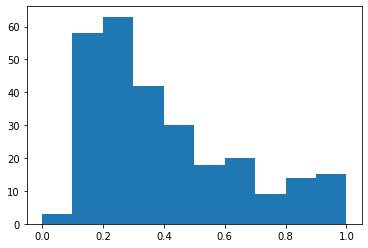

In [25]:
plt.hist(prob['probabilities']['LogisticRegression'])
plt.show()

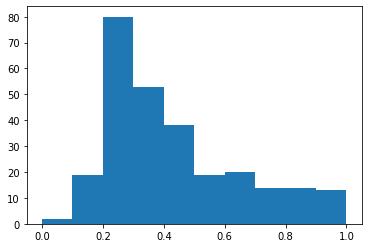

In [26]:
plt.hist(prob['probabilities']['Bayesian_LogisticRegression'])
plt.show()

In [27]:
pred['predict']

,ID,probabilities,predict
0,18,0.179149,0
1,19,0.250233,0
2,20,0.213080,0
3,21,0.143255,0
4,22,0.300910,0
...,...,...,...
267,308,0.903915,1
268,309,0.504449,0
269,310,0.582685,1
270,311,0.855855,1


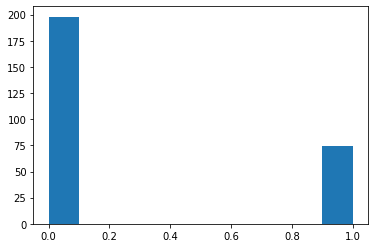

In [28]:
plt.hist(pred['predict']['predict'])
plt.show()

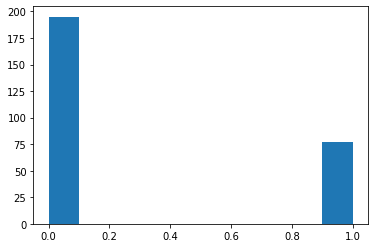

In [29]:
plt.hist(training_data.eventdeath)
plt.show()